<a href="https://colab.research.google.com/github/PreethikaDinesh/customer_insurance_prediction/blob/main/Customer_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                          **Customer Conversion Prediction**
**Problem Statement**

>


You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

**Features:**
* age (numeric)

* job : type of job

* marital : marital status

* educational_qual : education status

* call_type : contact communication type

* day: last contact day of the month (numeric)

* mon: last contact month of year

* dur: last contact duration, in seconds (numeric)

* num_calls: number of contacts performed during this campaign and for this client

* prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

* Output variable (target): y - has the client subscribed to the insurance or not?





***Baic Analysis about the dataset based on the given problem satatement and features***

* We can able to predict the target variable hence it is a **Supervised Learning**
* From the target variable it shows it is a **binary classification** problem
  the target variable contains only "yes" or "no" option



In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#upload the data set
data=pd.read_csv("train.csv")
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
#Rows and Columns in the dataset
data.shape

(45211, 11)

In the dataset there are 45211 rows and 11 columns

In [5]:
#display only columns
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

# Data Jar

#Clean the dataset

**Missing values**

In [6]:
data.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There is no missing values in the dataset




**Find** **Dulicates**

In [7]:
data.duplicated().sum()#There are 6 duplicates in the given dataset

6

In [8]:
data=data.drop_duplicates()#for removing the duplicates
data.shape

(45205, 11)

In [9]:
data.duplicated().sum()

0

There is no duplicates found after dropping the dupliates

**Data Types**

In [10]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

There is no changes in the datatypes

**Outlier detection**

Detecting outlier using box plot

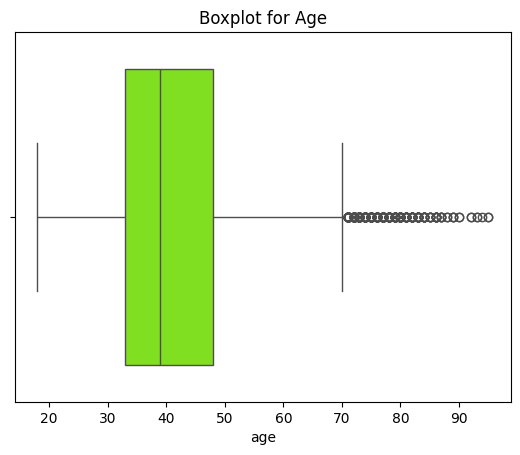

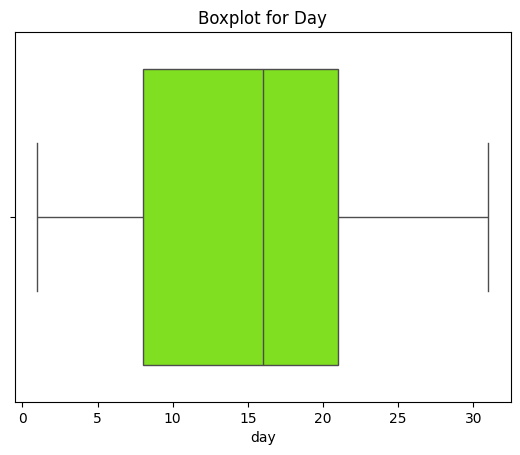

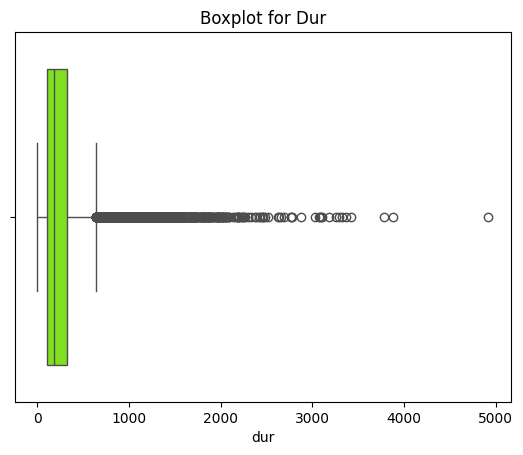

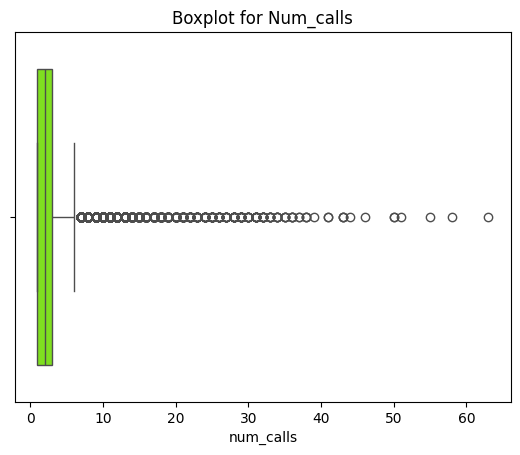

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
data1 = ["age", "day", "dur", "num_calls"]

# Loop through each feature in data1 and create a separate box plot
for feature1 in data1:
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(x=data[feature1], color='chartreuse')
    plt.title(f'Boxplot for {feature1.capitalize()}')
    plt.show()


Removing outlier using clipping

In [12]:
for feature in ["age","day","dur","num_calls"]:
  print(f"Feature - {feature}")
  iqr = data[feature].quantile(0.75) - data[feature].quantile(0.25)
  upper_threshold = data[feature].quantile(0.75) + (1.5 * iqr)
  lower_threshold = data[feature].quantile(0.25) - (1.5 * iqr)
  print(f"UpperThreshold - {upper_threshold} and lowerThreshold - {lower_threshold}")
  data[feature] = data[feature].clip(lower_threshold, upper_threshold)
  print(data[feature].describe())

Feature - age
UpperThreshold - 70.5 and lowerThreshold - 10.5
count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64
Feature - day
UpperThreshold - 40.5 and lowerThreshold - -11.5
count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64
Feature - dur
UpperThreshold - 643.0 and lowerThreshold - -221.0
count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64
Feature - num_calls
UpperThreshold - 6.0 and lowerThreshold - -2.0
count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000

After the removing the outlier

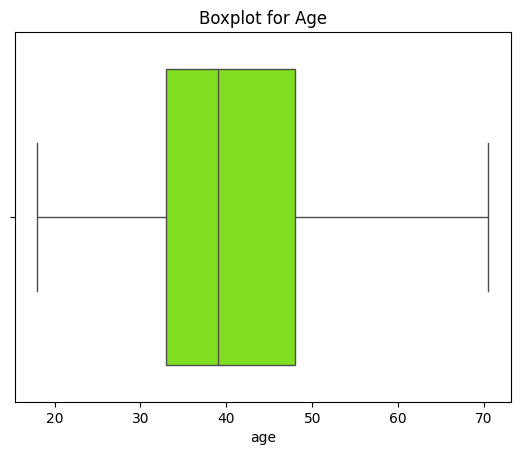

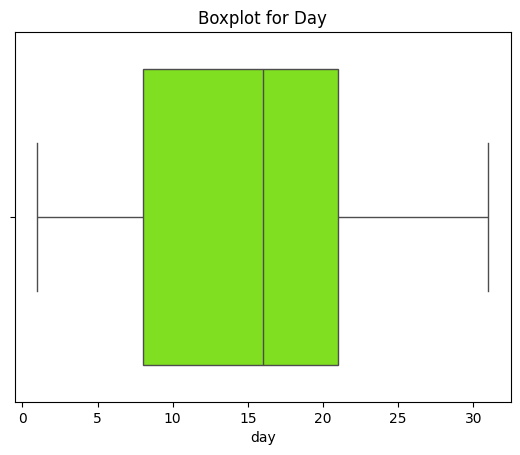

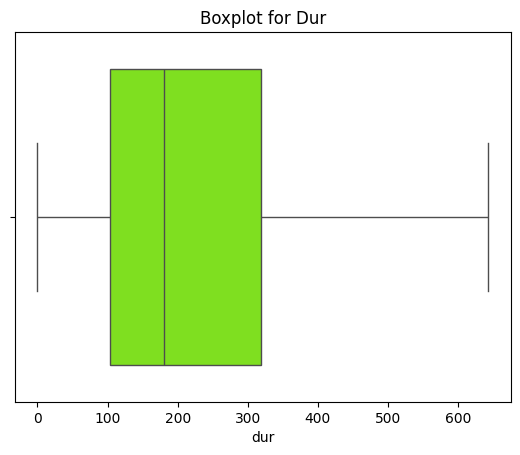

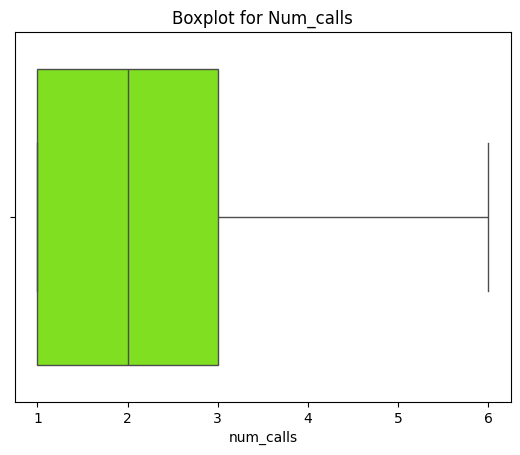

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
data1 = ["age", "day", "dur", "num_calls"]

# Loop through each feature in data1 and create a separate box plot
for feature1 in data1:
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(x=data[feature1], color='chartreuse')
    plt.title(f'Boxplot for {feature1.capitalize()}')
    plt.show()

From the box plot itself we come to know the day column has no outlier, other 3 columns(age,duration,num_calls)has outlier and it is removed by using clipping

**Encode the target variable**

In [14]:
data['y'] = data["y"].map({"yes":1 , "no": 0})

In [15]:
data.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47.0,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33.0,unknown,single,unknown,unknown,5,may,198,1,unknown,0


**Exploratory Data Analysis**

**->age**

In [16]:
data['age'].dtype


dtype('float64')

In [17]:
data['age'].describe()

count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

     age         y
32  50.0  0.076677
26  44.0  0.081866
30  48.0  0.082247
33  51.0  0.082265
22  40.0  0.085609
27  45.0  0.087171
38  56.0  0.087404
25  43.0  0.088717
24  42.0  0.089372
23  41.0  0.092951
34  52.0  0.093304
39  57.0  0.094203
37  55.0  0.094293
35  53.0  0.095398
21  39.0  0.096231
40  58.0  0.097297
20  38.0  0.098226
19  37.0  0.100236
28  46.0  0.100426
31  49.0  0.101610
16  34.0  0.102644
13  31.0  0.103206
36  54.0  0.103576
29  47.0  0.103860
14  32.0  0.106046
15  33.0  0.106491
18  36.0  0.108093
17  35.0  0.110348
41  59.0  0.114286
12  30.0  0.123506
11  29.0  0.144426
9   27.0  0.155116
10  28.0  0.156069
42  60.0  0.164430
8   26.0  0.166460
7   25.0  0.214421
5   23.0  0.217822
6   24.0  0.225166
52  70.0  0.253731
3   21.0  0.278481
2   20.0  0.300000
4   22.0  0.310078
1   19.0  0.314286
47  65.0  0.355932
48  66.0  0.380952
51  69.0  0.386364
43  61.0  0.387755
45  63.0  0.389610
49  67.0  0.425926
53  70.5  0.447639
46  64.0  0.472973
44  62.0  0.

<Axes: xlabel='y'>

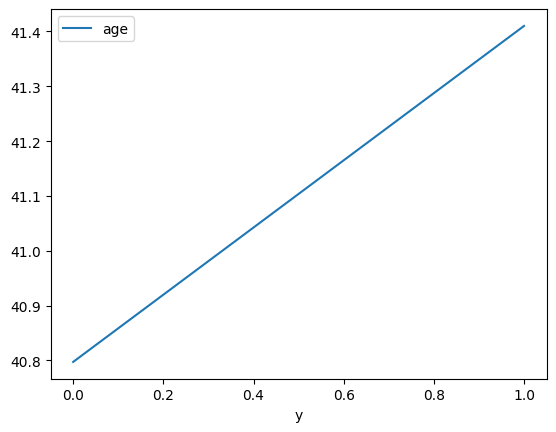

In [18]:
print(((data.groupby('age')['y'].mean()).reset_index().sort_values("y")))
((data.groupby('y')['age'].mean()).reset_index().sort_values("y")).plot(x="y",y="age")

**->job**

In [19]:
data.job.dtype

dtype('O')

In [20]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [21]:
data.job.value_counts()

job
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

              job         y
1     blue-collar  0.072765
2    entrepreneur  0.082717
3       housemaid  0.087903
7        services  0.088851
9      technician  0.110585
11        unknown  0.118056
6   self-employed  0.118429
0          admin.  0.122050
4      management  0.137570
10     unemployed  0.155027
5         retired  0.227915
8         student  0.286780


<Axes: xlabel='job'>

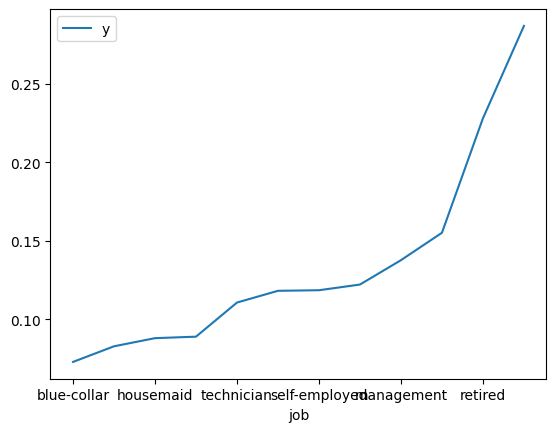

In [22]:
print(((data.groupby('job')['y'].mean()).reset_index().sort_values("y")))
((data.groupby('job')['y'].mean()).reset_index().sort_values("y")).plot(x="job",y="y")

**->marital**

In [23]:
data['marital'].dtype

dtype('O')

In [24]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [25]:
data.marital.value_counts()

marital
married     27210
single      12788
divorced     5207
Name: count, dtype: int64

    marital         y
1   married  0.101250
0  divorced  0.119455
2    single  0.149515


<Axes: xlabel='marital'>

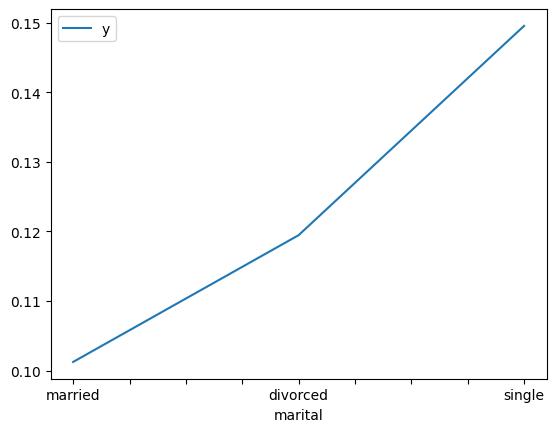

In [26]:
print(((data.groupby('marital')['y'].mean()).reset_index().sort_values("y")))
((data.groupby('marital')['y'].mean()).reset_index().sort_values("y")).plot(x="marital",y="y")

**->education_qual**

In [27]:
data['education_qual'].dtype

dtype('O')

In [28]:
data.education_qual.unique()


array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [29]:
data.education_qual.value_counts()

education_qual
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: count, dtype: int64

  education_qual         y
0        primary  0.086277
1      secondary  0.105608
3        unknown  0.135703
2       tertiary  0.150086


<Axes: xlabel='education_qual'>

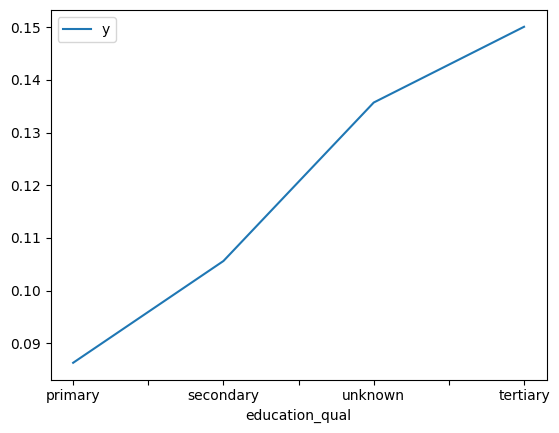

In [30]:
print(((data.groupby('education_qual')['y'].mean()).reset_index().sort_values("y")))
((data.groupby('education_qual')['y'].mean()).reset_index().sort_values("y")).plot(x="education_qual",y="y")

**call type**

In [31]:
data.call_type.dtype

dtype('O')

In [32]:
data.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [33]:
data.call_type.value_counts()

call_type
cellular     29282
unknown      13017
telephone     2906
Name: count, dtype: int64

   call_type         y
2    unknown  0.040716
1  telephone  0.134205
0   cellular  0.149204


<Axes: xlabel='call_type'>

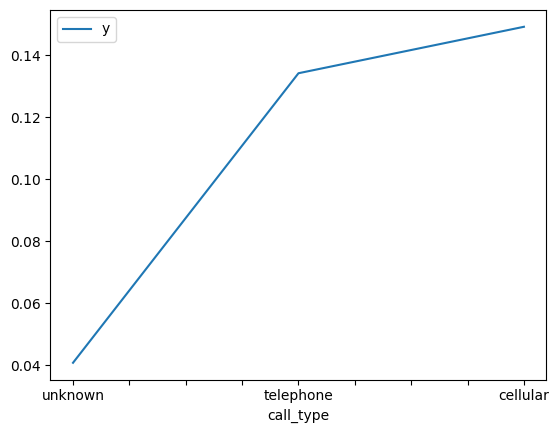

In [34]:
print(((data.groupby('call_type')['y'].mean()).reset_index().sort_values("y")))
((data.groupby('call_type')['y'].mean()).reset_index().sort_values("y")).plot(x="call_type",y="y")

**->month**

In [35]:
data.mon.dtype

dtype('O')

In [36]:
data.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [37]:
data.mon.value_counts()

mon
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

    mon         y
8   may  0.067199
5   jul  0.090949
4   jan  0.101212
9   nov  0.101511
6   jun  0.102266
1   aug  0.110168
3   feb  0.166478
0   apr  0.196794
10  oct  0.437669
11  sep  0.464594
2   dec  0.467290
7   mar  0.519916


<Axes: xlabel='mon'>

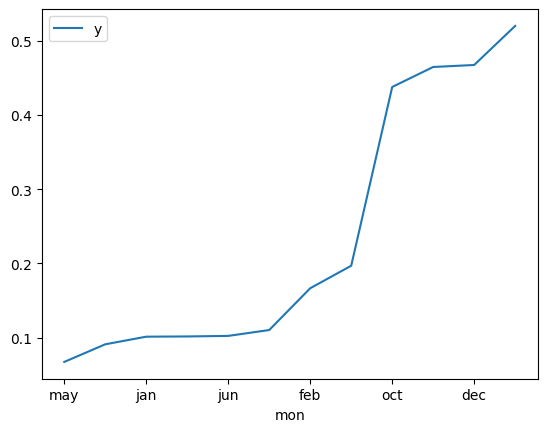

In [38]:
print(((data.groupby('mon')['y'].mean()).reset_index().sort_values("y")))
((data.groupby('mon')['y'].mean()).reset_index().sort_values("y")).plot(x="mon",y="y")

**->day**

In [39]:
data.day.dtype

dtype('int64')

In [40]:
data.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

    day         y
18   19  0.069476
19   20  0.069767
30   31  0.071540
28   29  0.073926
27   28  0.078185
6     7  0.086406
16   17  0.090768
5     6  0.093685
17   18  0.098787
20   21  0.099210
7     8  0.109239
25   26  0.112077
4     5  0.112565
13   14  0.113636
8     9  0.114744
10   11  0.122380
26   27  0.133809
22   23  0.134185
15   16  0.135689
23   24  0.138702
14   15  0.139753
1     2  0.140867
12   13  0.152050
11   12  0.152215
24   25  0.158333
3     4  0.159170
2     3  0.164968
21   22  0.170166
29   30  0.173052
9    10  0.230916
0     1  0.279503


<Axes: xlabel='y'>

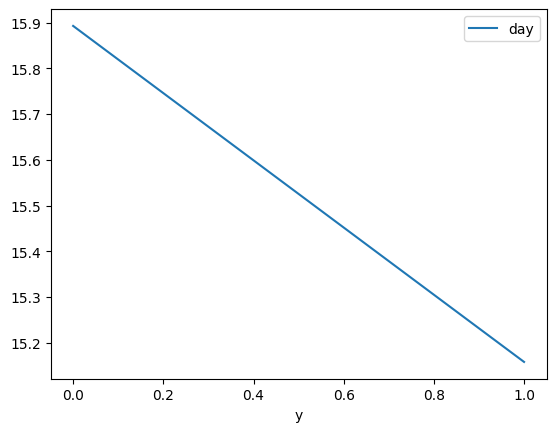

In [41]:
print(((data.groupby('day')['y'].mean()).reset_index().sort_values("y")))
((data.groupby('y')['day'].mean()).reset_index().sort_values("y")).plot(x="y",y="day")

**->duration**

In [42]:
data.dur.dtype

dtype('int64')

In [43]:
data.dur.value_counts()

dur
643    3247
124     187
90      184
89      177
114     175
       ... 
598       7
3         4
0         3
2         3
1         2
Name: count, Length: 644, dtype: int64

     dur         y
0      0  0.000000
37    37  0.000000
38    38  0.000000
40    40  0.000000
41    41  0.000000
..   ...       ...
587  587  0.500000
555  555  0.500000
643  643  0.509085
562  562  0.526316
615  615  0.545455

[644 rows x 2 columns]


<Axes: xlabel='y'>

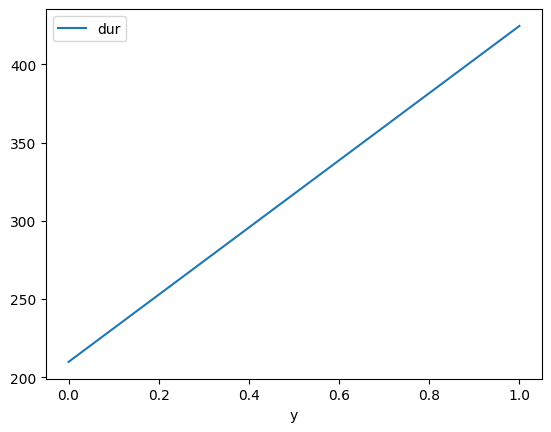

In [44]:
print(((data.groupby('dur')['y'].mean()).reset_index().sort_values("y")))
((data.groupby('y')['dur'].mean()).reset_index().sort_values("y")).plot(x="y",y="dur")

**->number of calls**

In [45]:
data.num_calls.dtype

dtype('int64')

In [46]:
data.num_calls.value_counts()

num_calls
1    17542
2    12503
3     5521
6     4355
4     3520
5     1764
Name: count, dtype: int64

   num_calls         y
5          6  0.058094
4          5  0.078798
3          4  0.090057
2          3  0.111936
1          2  0.112053
0          1  0.145992


<Axes: xlabel='y'>

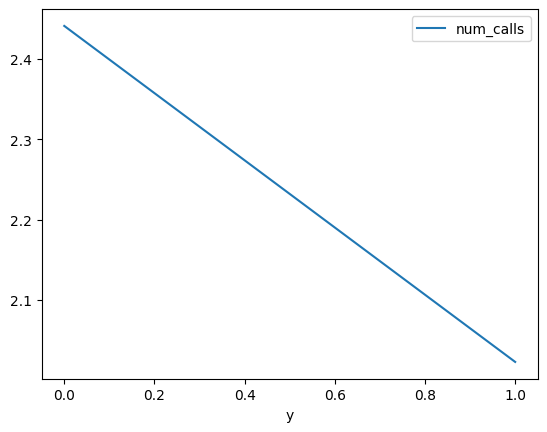

In [47]:
print(((data.groupby('num_calls')['y'].mean()).reset_index().sort_values("y")))
((data.groupby('y')['num_calls'].mean()).reset_index().sort_values("y")).plot(x="y",y="num_calls")

**->previous outcome**

In [48]:
data.prev_outcome.dtype

dtype('O')

In [49]:
data.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [50]:
data.prev_outcome.value_counts()

prev_outcome
unknown    36953
failure     4901
other       1840
success     1511
Name: count, dtype: int64

  prev_outcome         y
3      unknown  0.091630
0      failure  0.126097
1        other  0.166848
2      success  0.647253


<Axes: xlabel='prev_outcome'>

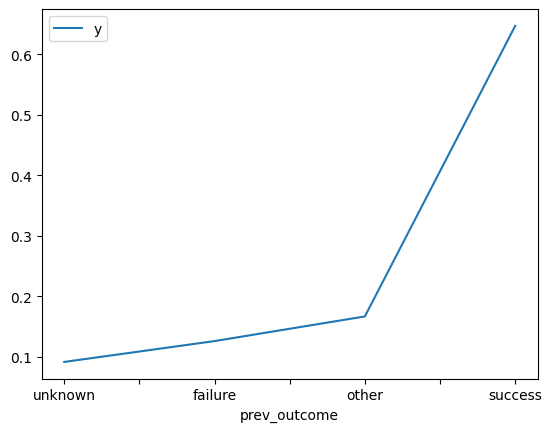

In [51]:
print(((data.groupby('prev_outcome')['y'].mean()).reset_index().sort_values("y")))
((data.groupby('prev_outcome')['y'].mean()).reset_index().sort_values("y")).plot(x="prev_outcome",y="y")

From the exploratory analysis all the columns are mostly related to the target column.Hence all the columns are important columns

**Encoding**

* Encoding is doing for converting categorical data in to continous data
* In this dataset we have 5 columns(job,marital,edu_qualf,call_type,month,prev_outcome)
* All these columns have some order hence we label encoding

**Job**

In [52]:
#Encoding for job column (Label Encoding)
data['job']=data['job'].map({'blue-collar':1,'entrepreneur':2,'housemaid':3,'services':4,'technician':5,'unknown':6,'self-employed':7,'admin.':8,'management':9, 'unemployed':10, 'retired': 11, 'student' : 12})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,9,married,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,5,single,secondary,unknown,5,may,151,1,unknown,0
2,33.0,2,married,secondary,unknown,5,may,76,1,unknown,0


**Marital**

In [53]:
#Encoding for Marital status (Label Encoding)
data['marital'] =data['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,9,1,tertiary,unknown,5,may,261,1,unknown,0
1,44.0,5,3,secondary,unknown,5,may,151,1,unknown,0
2,33.0,2,1,secondary,unknown,5,may,76,1,unknown,0


**Education_qual**

In [54]:
#encoding for educational qualification (Label Encoding)
data['education_qual'] = data['education_qual'].map({'primary': 1, 'secondary': 2,'unknown':3,'tertiary' :4})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,9,1,4,unknown,5,may,261,1,unknown,0
1,44.0,5,3,2,unknown,5,may,151,1,unknown,0
2,33.0,2,1,2,unknown,5,may,76,1,unknown,0


**Month**

In [55]:
# Encoding for month column (Label Encoding)
data['mon']=data['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'sep' : 10 , 'dec': 11, 'mar': 12})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,9,1,4,unknown,5,1,261,1,unknown,0
1,44.0,5,3,2,unknown,5,1,151,1,unknown,0
2,33.0,2,1,2,unknown,5,1,76,1,unknown,0


**Call Type**

In [56]:
# Encoding for call type column (Label Encoding)
data['call_type'] = data['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,9,1,4,1,5,1,261,1,unknown,0
1,44.0,5,3,2,1,5,1,151,1,unknown,0
2,33.0,2,1,2,1,5,1,76,1,unknown,0


**Previous outcome**

In [57]:
# Encoding for previous outcome column (Label Encoding)
data['prev_outcome']=data['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
data.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,9,1,4,1,5,1,261,1,1,0
1,44.0,5,3,2,1,5,1,151,1,1,0
2,33.0,2,1,2,1,5,1,76,1,1,0


In [58]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

##Spliting

In [59]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns[:10]].values
y = data.loc[: , 'y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [60]:
X_train.shape, X_test.shape

((33903, 10), (11302, 10))

##Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

#Task Jar

* From the given data set,it is supervised learning
* From the target column(y) we come to know it is a binary classification

#Check whether the given data set is balanced or imbalanced dataset

In [62]:
#Finding the percentage of the data
(data["y"].value_counts()/(len(data["y"])))*100

y
0    88.299967
1    11.700033
Name: count, dtype: float64

From the target variable(y),it clearly shows that for 0 - 88% and for 1 - 11% so it **Imbalanced data set**

Balance the unbalanced data set using SMOTE

In [63]:
from imblearn.over_sampling import SMOTE

cc = SMOTE(random_state=7)

X_train_smote, y_train_smote = cc.fit_resample(X_train, y_train)

In [65]:
print(len(X_train_smote))
print(len(y_train_smote))

59812
59812


#Model Jar

**Logistic Regression**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.889400106175898, F1-Score: 0.3329775880469584


**DecisionTreeClassifier**

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10]:
  model = DecisionTreeClassifier(max_depth = depth)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth: {depth}, Cross-Val Score: {cross_score}")

Depth: 1, Cross-Val Score: 0.8821048341566998
Depth: 2, Cross-Val Score: 0.8904822934907515
Depth: 3, Cross-Val Score: 0.8968826644188287
Depth: 4, Cross-Val Score: 0.8982689211160203
Depth: 5, Cross-Val Score: 0.898652306252278
Depth: 6, Cross-Val Score: 0.9000091949103519
Depth: 7, Cross-Val Score: 0.8977674200925755
Depth: 8, Cross-Val Score: 0.897649530381045
Depth: 9, Cross-Val Score: 0.896027233288881
Depth: 10, Cross-Val Score: 0.8945525854052327


In [77]:
model = DecisionTreeClassifier(max_depth = 6)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.903202972925146, F1-Score: 0.4935185185185185


**RandomForestClassifier**

In [78]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 3, max_features = "sqrt")

for n in [10, 20, 50, 100, 200, 500, 1000]:
  model = RandomForestClassifier(n_estimators = n, max_depth = 3, max_features = "sqrt")
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"N: {n}, Cross-Val Score: {cross_score}")

N: 10, Cross-Val Score: 0.8890365786930353
N: 20, Cross-Val Score: 0.8880040172276258
N: 50, Cross-Val Score: 0.8888004948027444
N: 100, Cross-Val Score: 0.8890659380330895
N: 200, Cross-Val Score: 0.8886824398090033
N: 500, Cross-Val Score: 0.888829932434372
N: 1000, Cross-Val Score: 0.8889184454077208


In [79]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 3, max_features = "sqrt")
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.8943549814192179, F1-Score: 0.17083333333333334


**XGboostClassifier**

In [80]:
from xgboost import XGBClassifier

for lamb in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = XGBClassifier(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.01, Cross-Val Score: 0.892664558013621
Lambda: 0.02, Cross-Val Score: 0.8988294017914852
Lambda: 0.03, Cross-Val Score: 0.900894124565373
Lambda: 0.04, Cross-Val Score: 0.9016610079257168
Lambda: 0.05, Cross-Val Score: 0.902427917383252
Lambda: 0.1, Cross-Val Score: 0.9037846059628603
Lambda: 0.11, Cross-Val Score: 0.9037256176117765
Lambda: 0.12, Cross-Val Score: 0.9042564518780842
Lambda: 0.13, Cross-Val Score: 0.9034895772168042
Lambda: 0.14, Cross-Val Score: 0.9036665509691193
Lambda: 0.15, Cross-Val Score: 0.902722545972377
Lambda: 0.2, Cross-Val Score: 0.9024866012671058
Lambda: 0.5, Cross-Val Score: 0.8995961807630645
Lambda: 0.7, Cross-Val Score: 0.8956437002685401
Lambda: 1, Cross-Val Score: 0.8909243973071177


In [81]:
model = XGBClassifier(learning_rate = 0.12)
model.fit(X_train, y_train)
print(f"Test data accuracy : {model.score(X_test, y_test)}, F1-Score: {f1_score(model.predict(X_test), y_test)}")

Test data accuracy : 0.9049725712263316, F1-Score: 0.5073394495412844


# **Final Solution**

* **F1-Score is used as a metric to evaluate the performance of the models**


* Logistic Regression - F1-Score is 0.33
* Decision Tree - F1-Score: 0.49
* XG Boost - F1-Score: 0.50
* Random Forest - F1-Score: 0.17

From the above F1-score metric evaluation,**XG Boost** is the best model with the percentage of 50%

**Feature Importance**

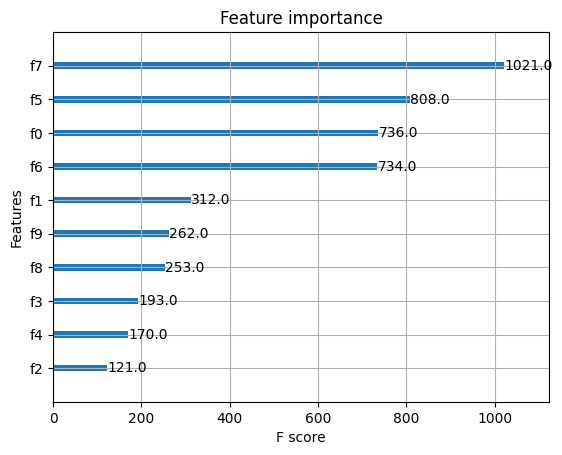

In [83]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [87]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

f0 - Age, f1 - Job, f2 - marital , f3- educational_qual , f4 - call type, f5 - day, f6 - mon, f7 -dur, f8 - num_calls, f9 - prev_outcome f10 - y

**Conclusion**

Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

The client should focused on the top few features of order given below to have them subscribed to the insurance.

* Duration - Longer the call better influncing the clients
* Day - People who subscribed to insurance are mostly mid of the month.
* Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.
* Month - In the month of may people subscribed to insurance are more.
* Job - In this blue collar people are targeted more but people who subscribed more are from management job.
